In [5]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util

In [6]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [7]:
model = MultiPoleModel(moments=3, lrate=0.00025, optimizer='nadam', loss='mse', scale=1e9, early_stop=False, target_stop=4)
test_epochs = 2000

In [8]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 40035.06
epoch  1 --- Loss --- 39564.645
epoch  2 --- Loss --- 39127.992
epoch  3 --- Loss --- 38702.47
epoch  4 --- Loss --- 38284.402
epoch  5 --- Loss --- 37872.375
epoch  6 --- Loss --- 37465.633
epoch  7 --- Loss --- 37063.715
epoch  8 --- Loss --- 36666.324
epoch  9 --- Loss --- 36273.25
epoch  10 --- Loss --- 35884.36
epoch  11 --- Loss --- 35499.555
epoch  12 --- Loss --- 35118.758
epoch  13 --- Loss --- 34741.906
epoch  14 --- Loss --- 34368.95
epoch  15 --- Loss --- 33999.84
epoch  16 --- Loss --- 33634.527
epoch  17 --- Loss --- 33272.965
epoch  18 --- Loss --- 32915.11
epoch  19 --- Loss --- 32560.912
epoch  20 --- Loss --- 32210.316
epoch  21 --- Loss --- 31863.28
epoch  22 --- Loss --- 31519.748
epoch  23 --- Loss --- 31179.666
epoch  24 --- Loss --- 30842.982
epoch  25 --- Loss --- 30509.64
epoch  26 --- Loss --- 30179.588
epoch  27 --- Loss --- 29852.77
epoch  28 --- Loss --- 29529.127
epoch  29 --- Loss --- 29208.607
epoch  30 --- Loss --- 28891.1

In [9]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 68.7900210460027 minutes


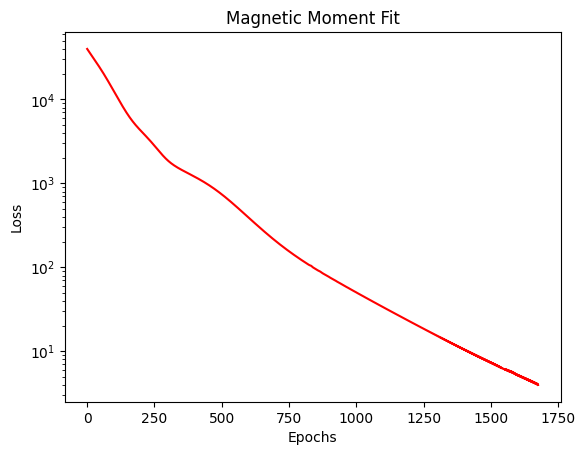

In [10]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [11]:
model.moment()

---- Moment  0 -----
Position:  [[-0.00435966 -0.02365379  0.1609254 ]]
Value:     [[0.0529842  0.13464354 2.708065  ]]
---- Moment  1 -----
Position:  [[ 0.50520945 -0.0035486  -0.00067257]]
Value:     [[0.9468745  0.01854468 0.00601804]]
---- Moment  2 -----
Position:  [[-0.0050448   0.26377875 -0.01899093]]
Value:     [[0.00778549 1.7964854  0.2901379 ]]
